In [54]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik

pd.options.display.max_columns = None #полностью отображаем столбцы
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

In [55]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arnabchaki/data-science-salaries-2023")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\фвьшт\.cache\kagglehub\datasets\arnabchaki\data-science-salaries-2023\versions\1


In [56]:
df = pd.read_csv('C:/Users/Public/Documents/ds_salaries.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [57]:
# первые строки датасета
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [58]:
# Общая информация по признакам

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [59]:
# Уникальные значения категориальных признаков

df.select_dtypes(include='object').nunique()

experience_level       4
employment_type        4
job_title             93
salary_currency       20
employee_residence    78
company_location      72
company_size           3
dtype: int64

In [60]:
#заменим верхний регистр на нижний
df.columns = df.columns.str.lower()
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [61]:
#  Проверка пропущенных значений

df.isna().sum()


work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [62]:
# заполнение пустых городов

df['employee_residence'].fillna('Unknown', inplace=True)

In [63]:
# Проверка и удаление дубликатов

df.duplicated().sum()  # Количество дубликатов

# Удаление дубликатов
df = df.drop_duplicates()

In [64]:
# Ещё раз проверим

df.isna().sum()
df.duplicated().sum()

0

In [65]:
# Распределение ключевых категорий

# уровень опыта работы в течение года

df['experience_level'].value_counts()

experience_level
SE    1554
MI     664
EN     270
EX      96
Name: count, dtype: int64

In [66]:
# тип занятости для данной должности

df['employment_type'].value_counts()

employment_type
FT    2547
PT      17
CT      10
FL      10
Name: count, dtype: int64

In [67]:
# среднее количество сотрудников, работавших в компании в течение года

df['company_size'].value_counts()

company_size
M    2028
L     409
S     147
Name: count, dtype: int64

In [68]:
# общий объем работы, выполненной удаленно

df['remote_ratio'].value_counts()

remote_ratio
100    1211
0      1186
50      187
Name: count, dtype: int64

In [69]:
#основная страна проживания сотрудника в течение рабочего года в формате кода страны ISO 3166.

df['employee_residence'].value_counts().head(10)

employee_residence
US    1893
GB     150
CA      81
IN      70
ES      47
DE      47
FR      37
PT      18
BR      18
NL      15
Name: count, dtype: int64

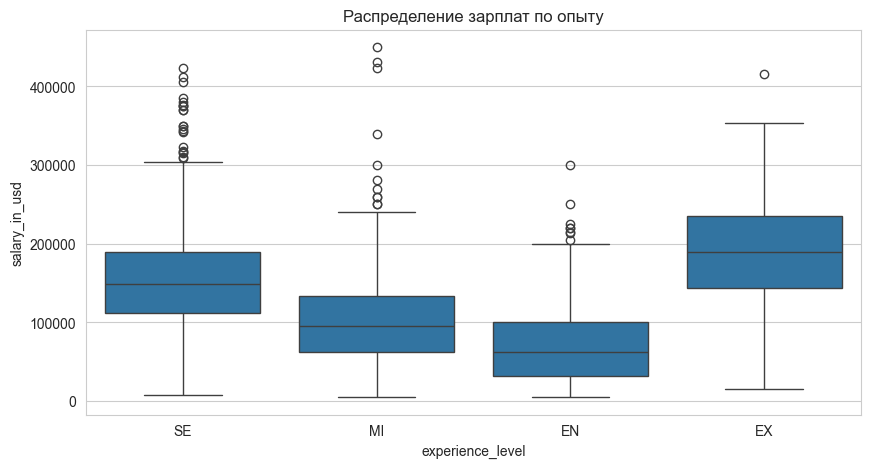

In [70]:
# Визуальный анализ распределения зарплат

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd')
plt.title("Распределение зарплат по опыту")
plt.show()

# EN — Junior (Entry-Level)
# MI — Middle (Mid-Level)
# SE — Senior
# EX — Executive (C-level) - Опыт влияет на уровень зарплаты

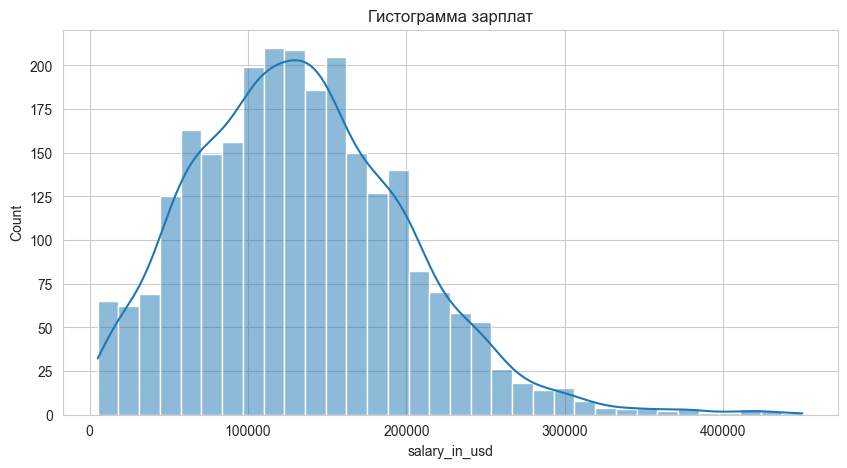

In [71]:
plt.figure(figsize=(10, 5))
sns.histplot(df['salary_in_usd'], kde=True)
plt.title("Гистограмма зарплат")
plt.show()

# чем выше зарплата - тем меньше вакансий

In [72]:
# Корреляция числовых признаков

df.corr(numeric_only=True)

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.099153,0.236958,-0.219160
salary,-0.099153,1.000000,-0.043672,0.026485
salary_in_usd,0.236958,-0.043672,1.000000,-0.084502
remote_ratio,-0.219160,0.026485,-0.084502,1.000000


<Axes: >

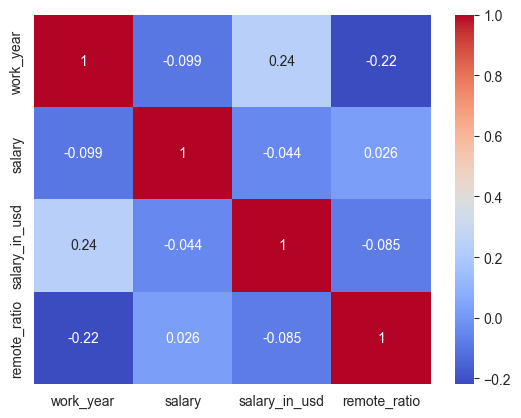

In [73]:
# тепловая карта:

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

# почти нет связ года выплаты с зарплатой, а также почти нет связи зарплаты с объмом выполненой работы

In [74]:
#  1. Самые высокооплачиваемые должности

df.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False).head(10)

job_title
Data Science Tech Lead                 375000.0
Cloud Data Architect                   250000.0
Data Lead                              212500.0
Data Analytics Lead                    211254.5
Head of Data                           202500.0
Principal Data Engineer                192500.0
Applied Scientist                      192000.0
Principal Machine Learning Engineer    190000.0
Data Infrastructure Engineer           183655.0
Machine Learning Software Engineer     181800.0
Name: salary_in_usd, dtype: float64

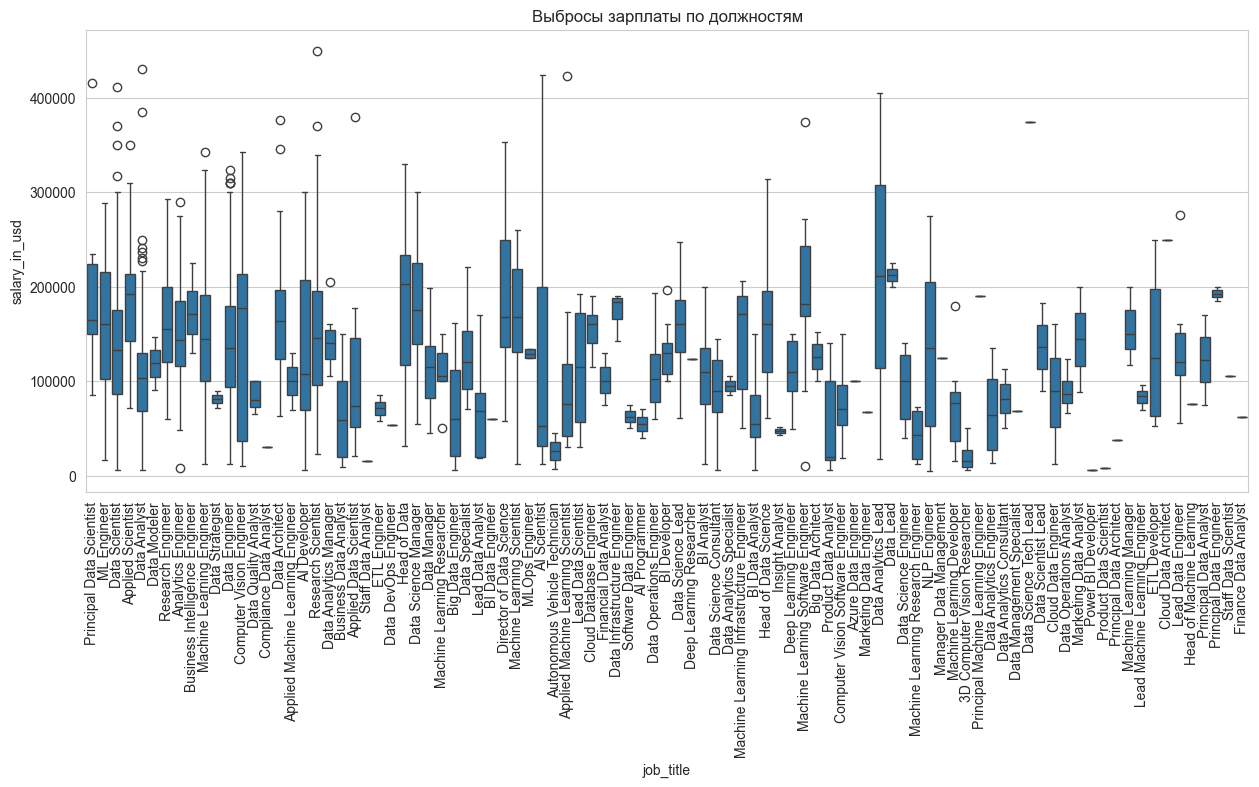

In [75]:
# 2. Есть ли выбросы в зарплатах? В каких должностях?

plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='job_title', y='salary_in_usd')
plt.xticks(rotation=90)
plt.title("Выбросы зарплаты по должностям")
plt.show()

In [76]:
# Влияет ли удалёнка на зарплату?

df.groupby('remote_ratio')['salary_in_usd'].median()

# (0 = нет удалёнки, 50 = гибрид, 100 = полностью удалённо)

remote_ratio
0      137500.0
50      63312.0
100    130000.0
Name: salary_in_usd, dtype: float64

In [77]:
# 4. Зависит ли зарплата от размера компании?

df.groupby('company_size')['salary_in_usd'].median().sort_values(ascending=False)

company_size
M    137067.5
L    100000.0
S     62726.0
Name: salary_in_usd, dtype: float64

In [78]:
# 5. Популярные страны и уровень зарплат

# Популярные

df['employee_residence'].value_counts().head(10)



employee_residence
US    1893
GB     150
CA      81
IN      70
ES      47
DE      47
FR      37
PT      18
BR      18
NL      15
Name: count, dtype: int64

In [79]:
# Средняя зарплата по странам

df.groupby('employee_residence')['salary_in_usd'].median().sort_values(ascending=False).head(10)

employee_residence
IL    423834.0
MY    200000.0
PR    160000.0
US    147000.0
CN    125404.0
NZ    125000.0
CA    120000.0
BA    120000.0
AE    115000.0
CH    112549.5
Name: salary_in_usd, dtype: float64

In [80]:
#6. Медианная зарплата по должностям

df.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False)

job_title
Data Science Tech Lead           375000.0
Cloud Data Architect             250000.0
Data Lead                        212500.0
Data Analytics Lead              211254.5
Head of Data                     202500.0
                                   ...   
Product Data Analyst              20000.0
Staff Data Analyst                15000.0
3D Computer Vision Researcher     15000.0
Product Data Scientist             8000.0
Power BI Developer                 5409.0
Name: salary_in_usd, Length: 93, dtype: float64

In [81]:
# 7. Как изменились зарплаты в 2023 по сравнению с 2020

# Медианная зарплата по должностям в 2020 и 2023
# Оставим только 2020 и 2023
salary_filtered = df[df['work_year'].isin([2020, 2023])]

# Группируем по году и должности → медианная зарплата
salary_by_year = salary_filtered.groupby(['job_title', 'work_year'])['salary_in_usd'].median().unstack()

# Убедимся, что обе колонки (2020 и 2023) есть
salary_by_year = salary_by_year.dropna(subset=[2020, 2023])

# Добавим процент изменения
salary_by_year['change_%'] = ((salary_by_year[2023] - salary_by_year[2020]) / salary_by_year[2020]) * 100

# Сортировка по убыванию прироста
salary_by_year.sort_values('change_%', ascending=False)



work_year,2020,2023,change_%
job_title,,,
ML Engineer,15966.0,180000.0,1027.395716
AI Scientist,45896.0,231232.5,403.818416
Computer Vision Engineer,60000.0,212500.0,254.166667
Machine Learning Infrastructure Engineer,50180.0,171600.0,241.968912
Data Analyst,34784.0,108000.0,210.487580
Data Scientist,62726.0,150000.0,139.135287
Data Engineer,72134.5,145000.0,101.013385
Data Science Consultant,54353.5,94000.0,72.941945
Product Data Analyst,13036.0,16414.0,25.912857


In [82]:
 #8. Портрет самого успешного работника

df[df['salary_in_usd'] == df['salary_in_usd'].max()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3522,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M


In [83]:
#9. Живут и работают в разных странах

# Люди, у кого место работы и проживания не совпадает
df_diff_country = df[df['employee_residence'] != df['company_location']]


In [84]:
# Количество таких людей
df_diff_country.shape[0]


96

In [85]:
# Сколько процентов работают на другую страну
percent_remote_country = df_diff_country.shape[0] / df.shape[0] * 100
percent_remote_country

3.7151702786377707